# Heart Disease EDA
Simple exploratory analysis — pie charts per feature over target, plus distributions.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
train = pd.read_csv(r'F:\Bacancy\Heart_disease_MLflow\data\train.csv')
train.drop(columns=['id'], inplace=True, errors='ignore')
target = 'Heart Disease'
print(train.shape)
train.head()

(630000, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


### Chest paint tyep

- 1=typical angina (exertion-related, relieved by rest)
- 2=atypical angina (non-classic chest discomfort)
- 3=non-anginal pain (from digestion or musculoskeletal issues)
- 4=asymptomatic (no pain, often severe disease)

### Blood Pressure (BP)

- Values ≥140 indicate hypertension, a key risk for atherosclerosis and heart strain

### Cholesterol

- Serum level in mg/dl reflects blood lipids
- more than 200 mg/dl heightens artery plaque risk, narrowing vessels and limiting heart blood flow. 
- High cholesterol independently predicts coronary disease, especially with other factors

### FBS over 120	

- Binary (1=yes, 0=no): Indicates diabetes or impaired glucose

### EKG results	

- 0=normal, 
- 1=ST-T wave abnormality, 
- 2=left ventricular hypertrophy

### Max HR	

- Peak rate during exercise
- Lower values (<140 bpm) imply poor cardiac reserve

### Exercise angina	

- Binary (1=yes, 0=no)
- Chest pain from exertion signals myocardial oxygen demand exceeding supply due to blockages

### ST depression	

- Numeric (0-6.2)
- Measures exercise-induced ST segment drop on EKG
- Quantifying ischemia severity—higher values mean worse subendocardial oxygen mismatch

### Slope of ST	

- Peak exercise ST slope 
- 1=upsloping=normal
- 2=flat=ischemia possible
- 3=downsloping=definite ischemia
- Downsloping indicates severe coronary disease via poor recovery

### Number of vessels fluro	

- Values (0-3) 
- Angiographic count of narrowed vessels (LAD, LCX, RCA, etc.) by fluoroscopy
- More vessels mean multivessel disease and worse prognosis

### Thallium

- 3=normal
- 6=fixed defect=scar
- 7=reversible defect=ischemia

## Target Distribution

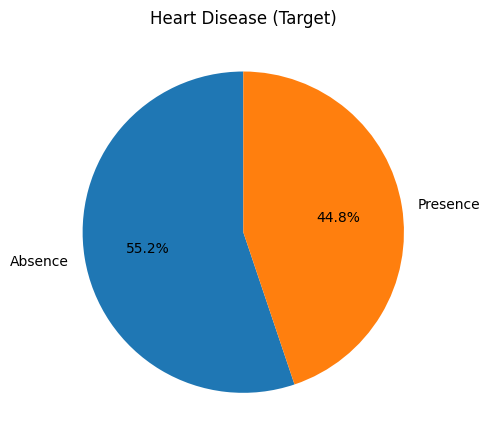

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
counts = train[target].value_counts()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Heart Disease (Target)')
plt.tight_layout()
plt.show()

## Pie Charts: Each Feature by Target

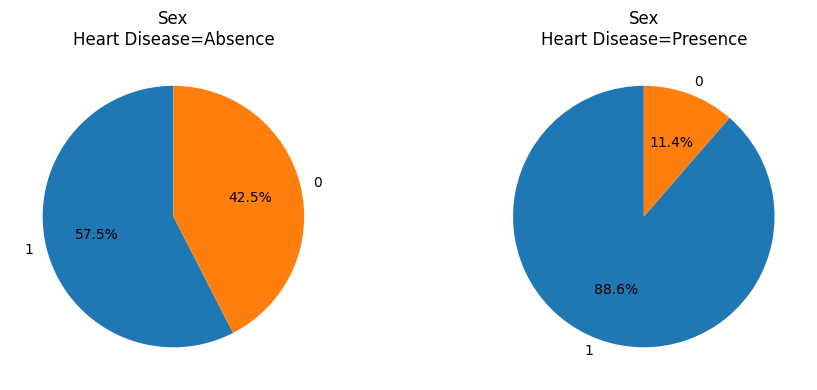

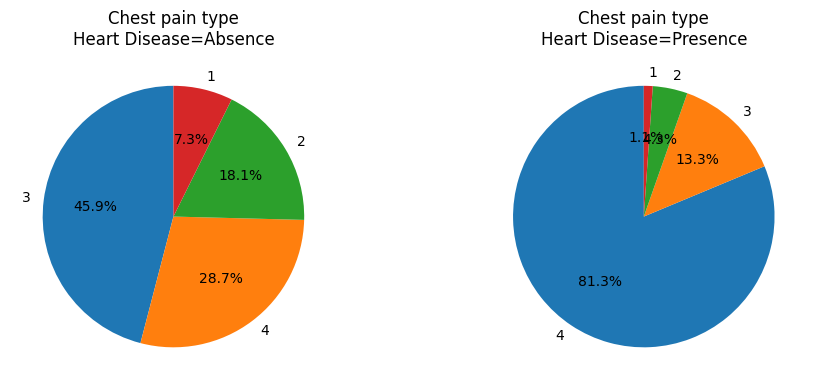

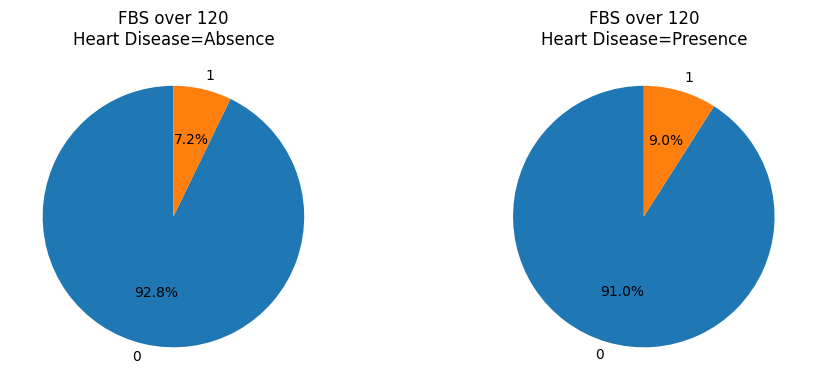

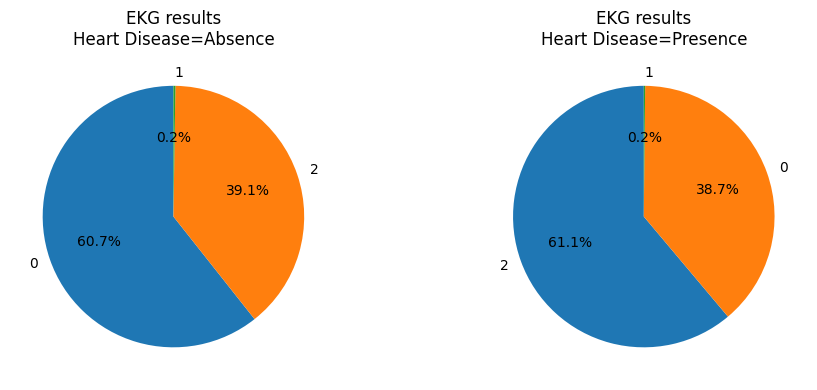

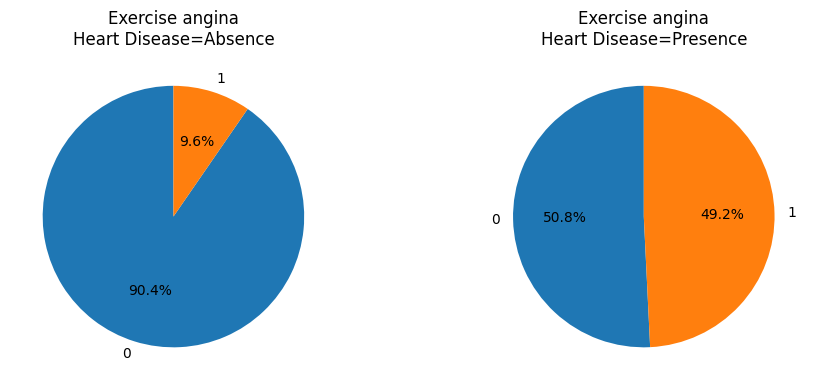

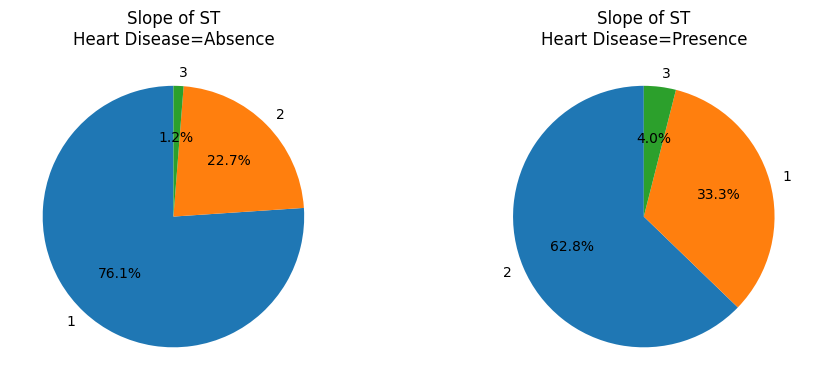

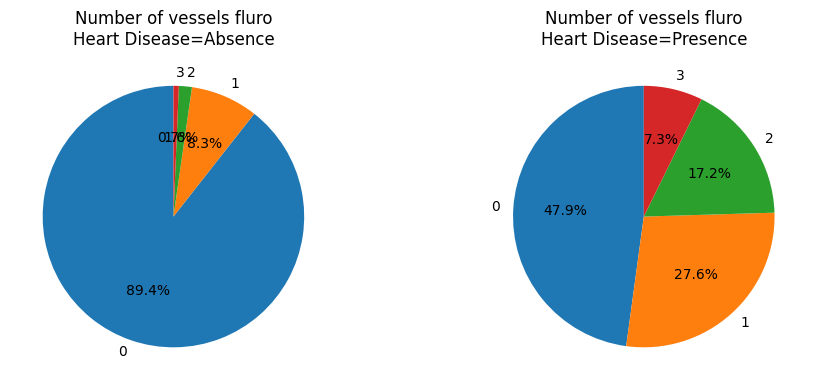

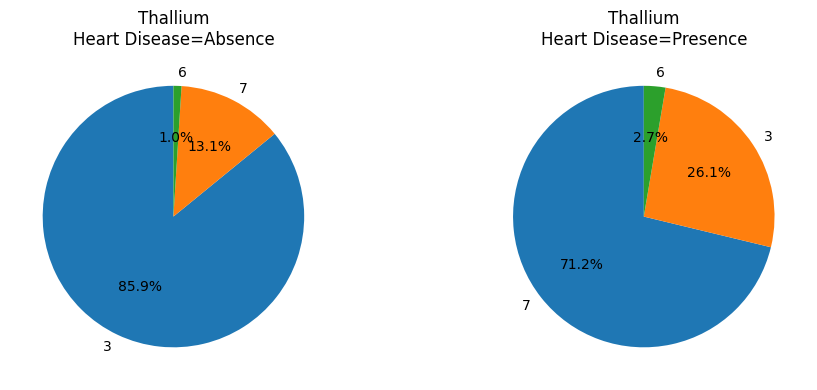

In [5]:
cat_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
                'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

target_vals = train[target].unique()

for feat in cat_features:
    if feat not in train.columns:
        continue
    fig, axes = plt.subplots(1, len(target_vals), figsize=(5 * len(target_vals), 4))
    if len(target_vals) == 1:
        axes = [axes]
    for ax, tval in zip(axes, sorted(target_vals)):
        subset = train[train[target] == tval][feat].value_counts()
        ax.pie(subset, labels=subset.index.astype(str), autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{feat}\n{target}={tval}')
    plt.tight_layout()
    plt.show()

## Distributions: Numeric Features over Target

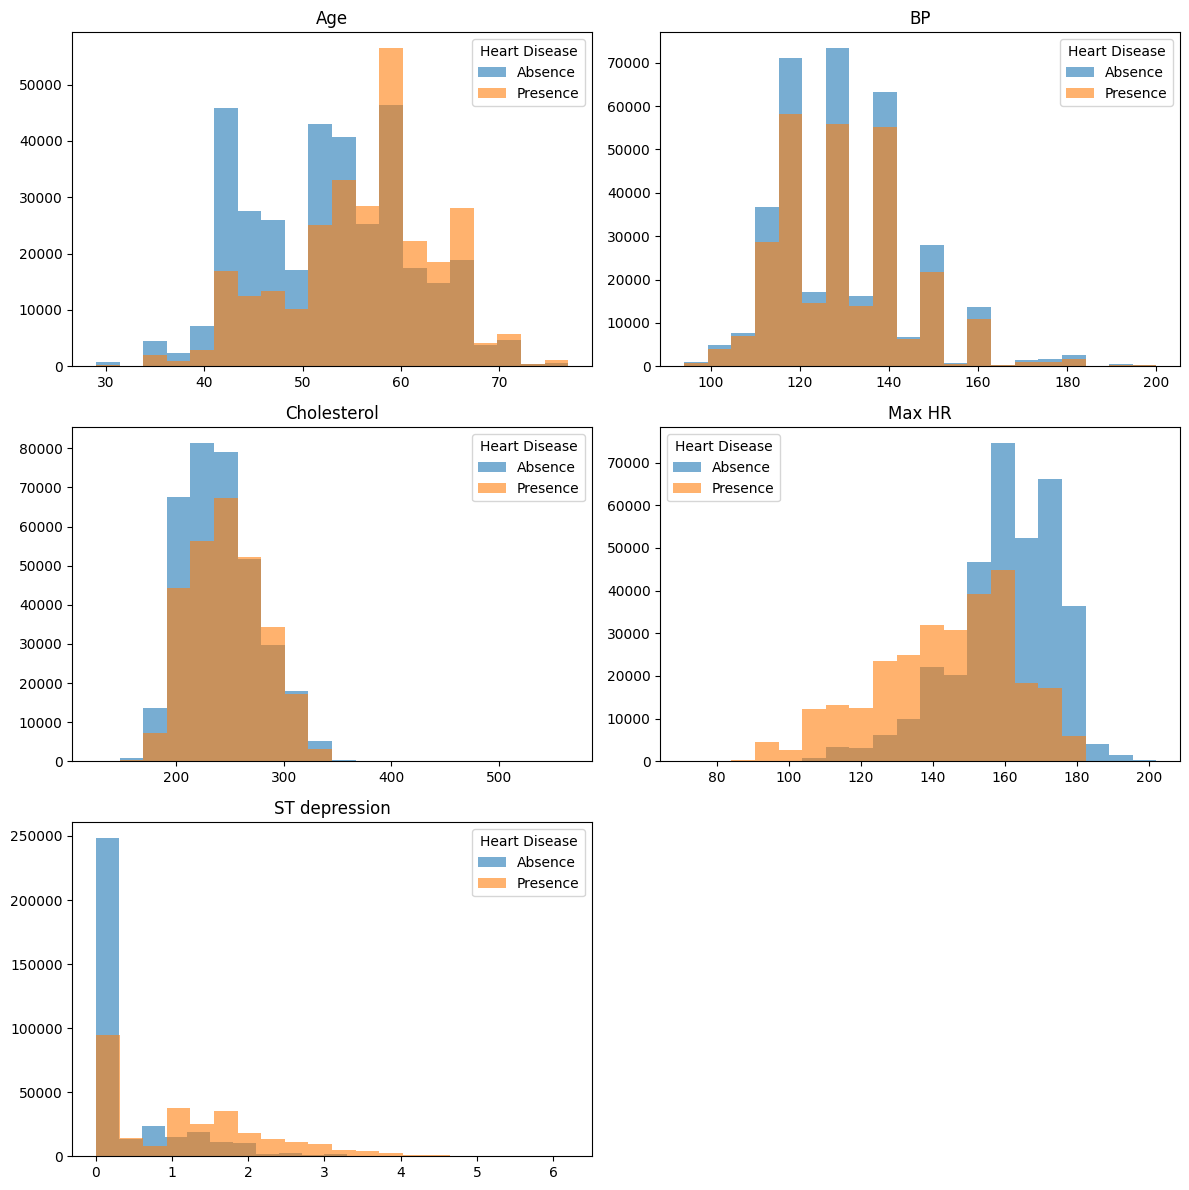

In [6]:
num_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
num_features = [f for f in num_features if f in train.columns]

cols = 2
rows = math.ceil(len(num_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, feat in zip(axes, num_features):
    for tval in sorted(train[target].unique()):
        subset = train[train[target] == tval][feat].dropna()
        ax.hist(subset, alpha=0.6, label=str(tval), bins=20)

    ax.set_title(feat)
    ax.legend(title=target)

for i in range(len(num_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Feature importance As per models

In [ ]:
import pickle

with open(r"F:\Bacancy\Heart_disease_MLflow\models\cat_best.pkl", "rb") as f:
    cat_model = pickle.load(f)

with open(r"F:\Bacancy\Heart_disease_MLflow\models\xgb_best.pkl", "rb") as f:
    xgb_model = pickle.load(f)


In [8]:
cat_importance = cat_model.get_feature_importance()
feature_names = cat_model.feature_names_

cat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": cat_importance
}).sort_values(by="importance", ascending=False)

print(cat_df.head(10))

                    feature  importance
7                    Max HR   20.504260
12                 Thallium   19.305679
2           Chest pain type   16.574323
11  Number of vessels fluro   10.286602
8           Exercise angina    6.821051
9             ST depression    6.396863
10              Slope of ST    6.208728
1                       Sex    5.818253
0                       Age    3.914446
4               Cholesterol    1.982269


In [10]:
xgb_importance = xgb_model.get_booster().get_score(importance_type='gain')

xgb_df = pd.DataFrame({
    "feature": list(xgb_importance.keys()),
    "importance": list(xgb_importance.values())
}).sort_values(by="importance", ascending=False)

print(xgb_df.head(10))

                    feature   importance
12                 Thallium  3519.900635
2           Chest pain type  1104.092041
8           Exercise angina   775.380798
11  Number of vessels fluro   615.704956
10              Slope of ST   492.776581
1                       Sex   352.531372
9             ST depression   137.330383
7                    Max HR    97.183502
6               EKG results    88.255051
0                       Age    35.465099


In [13]:
cat_df["importance_norm"] = cat_df["importance"] / cat_df["importance"].sum()
xgb_df["importance_norm"] = xgb_df["importance"] / xgb_df["importance"].sum()

In [14]:
merged_df = pd.merge(
    cat_df[["feature", "importance_norm"]],
    xgb_df[["feature", "importance_norm"]],
    on="feature",
    how="outer",
    suffixes=("_cat", "_xgb")
).fillna(0)

merged_df = merged_df.sort_values(
    by="importance_norm_cat",
    ascending=False
)

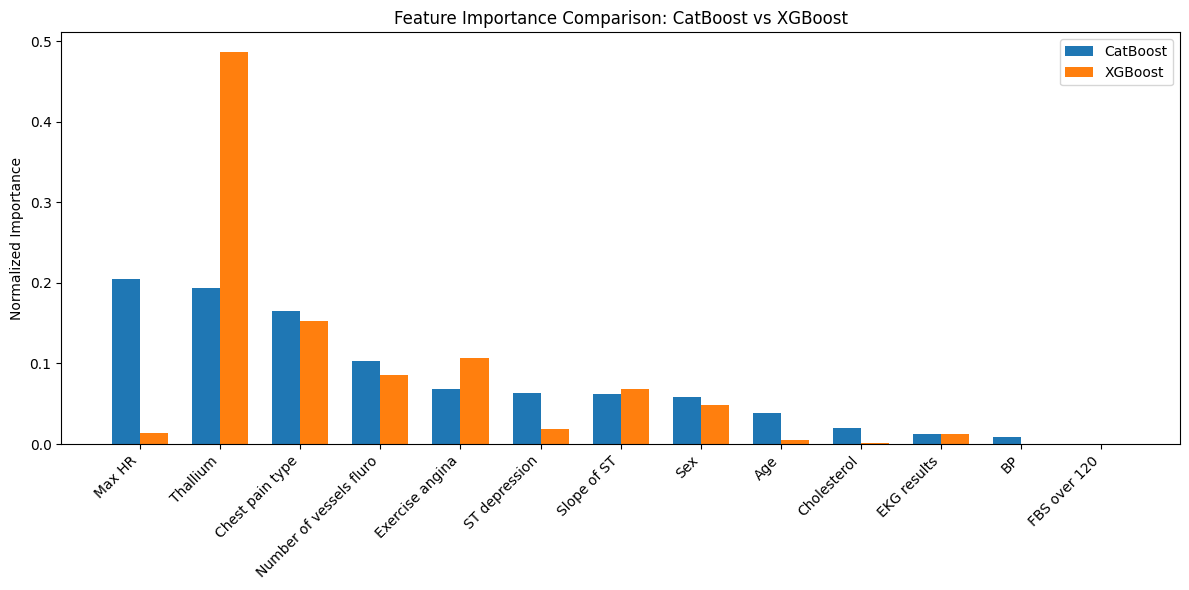

In [16]:
top_n = 15
plot_df = merged_df.head(top_n)

x = np.arange(len(plot_df))
width = 0.35

plt.figure(figsize=(12,6))

plt.bar(x - width/2, plot_df["importance_norm_cat"], width, label="CatBoost")
plt.bar(x + width/2, plot_df["importance_norm_xgb"], width, label="XGBoost")

plt.xticks(x, plot_df["feature"], rotation=45, ha="right")
plt.ylabel("Normalized Importance")
plt.title("Feature Importance Comparison: CatBoost vs XGBoost")
plt.legend()

plt.tight_layout()
plt.show()

# Insights

> - Chest Pain Type 4 carry the highest disease risk<br>
> Despite reporting no pain, type 4 patients represent a disproportionately large share of "Presence" cases.<br>
> Chest Pain Type accounts for 16.6% of feature importance in CatBoost and ~18.2% in XGBoost 


> - Thallium scan is the strongest structural predictor<br>
> Thallium ranks #1 in XGBoost (highest information gain at ~3,519.9 units) and #2 in CatBoost at 19.3% importance. 
> Where value 7 is observed in 71% share of "presence" cases

> - Max HR is the single largest CatBoost feature at 20.5% importance

> - ST Depression contributes 6.2% (CatBoost) with a 0–6.2 range where higher values = more danger

> - Cholesterol contributes only ~1.98% importance in CatBoost and FBS over 120 (diabetes indicator) is the lowest-ranked feature at roughly no importance Dispite having strong clinical reputation